## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [41]:
a=-2
b=1
X=np.linspace(0,20)
Y=a*X + b  

In [42]:
data=X.reshape((-1,1))
label=Y.reshape((-1,1))

In [43]:
data.shape,label.shape

((50, 1), (50, 1))

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [ ]:
def batch_gradient_descent(X, y_true, epochs,learning_parameter):
    theta_0=0
    theta_1=0
    x_0=1
    slopes=[]
    loss=[]
    bias=[]
    itere=[]
    hyp=[]
    for i in range(epochs):
        hypothsis_fn=theta_0+theta_1*X
        hyp.append(hypothsis_fn)
        cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
        loss.append(cost_fn)
        if cost_fn >0.01:
            gradient_theta_0=1/(len(X))*np.sum(hypothsis_fn - y_true)
            gradient_theta_1=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
            theta_0=theta_0-learning_parameter*gradient_theta_0
            bias.append(theta_0)
            theta_1=theta_1-learning_parameter*gradient_theta_1
            slopes.append(theta_1)
            itere.append(i)
        else:
            break
    return theta_0,theta_1,itere,loss,bias,slopes

In [ ]:
theta_0,theta_1,itere,loss,bias,slopes=batch_gradient_descent(data,label,1000,0.001)

#### Try your function with any input parameterss of your choice.

#### Calculate r2 score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y=theta_0+(theta_1*data)

In [ ]:
a=r2_score(label,y)
a

#### Plot loss vs. epochs

In [ ]:
plt.plot(itere,loss, color ='blue', label = 'alpha = 0.001')
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

In [ ]:
plt.plot(bias,loss)

In [ ]:
plt.plot(slopes,loss)

#### Plot all regression lines till converge

In [ ]:
plt.scatter(data,label)
for i in range(50):
    #slopes, bias = np.polyfit(data,y)
    plt.plot(data[i],y[i])
plt.show()

#### Plot the best regression line

In [ ]:
plt.scatter(data,label)
plt.plot(data,y, '-',color='red')

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate):
    theta_0=0
    theta_1=0
    x_0=1
    #learning_parameter=0.001
    slopes=[]
    loss=[]
    bias=[]
    itere=[]
    hyp=[]
    #iterations=1000
    for i in range(epochs):
        hypothsis_fn=theta_0+theta_1*X
        cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
        if cost_fn >0.01:
            hyp.append(hypothsis_fn)
            loss.append(cost_fn)
            gradient_theta_0=1/(len(X))*np.sum(hypothsis_fn - y_true)
            gradient_theta_1=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
            theta_0=theta_0-learning_rate*gradient_theta_0
            bias.append(theta_0)
            theta_1=theta_1-learning_rate*gradient_theta_1
            slopes.append(theta_1)
            itere.append(i)
        else:
            break
    return theta_0,theta_1,itere,loss,bias,slopes

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate):
    theta_0=0
    theta_1=0
    x_0=1
    #learning_parameter=0.001
    slopes=[]
    loss=[]
    bias=[]
    itere=[]
    hyp=[]
    #iterations=1000
    for i in range(epochs):
        hypothsis_fn=theta_0+theta_1*X
        cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
        if cost_fn >0.01:
            hyp.append(hypothsis_fn)
            loss.append(cost_fn)
            gradient_theta_0=1/(len(X))*np.sum(hypothsis_fn - y_true)
            gradient_theta_1=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
            theta_0=theta_0-learning_rate*gradient_theta_0
            bias.append(theta_0)
            theta_1=theta_1-learning_rate*gradient_theta_1
            slopes.append(theta_1)
            itere.append(i)
        else:
            break
    return theta_0,theta_1,itere,loss,bias,slopes

In [ ]:
theta_0,theta_1,itere,loss,bias,slopes=batch_gradient_descent(data,label,5, learning_rate = 0.1)

In [ ]:
plt.plot(bias,loss)
plt.ylabel('loss')
plt.xlabel('theta_0')

In [ ]:
plt.plot(slopes,loss)
plt.ylabel('loss')
plt.xlabel('theta_1')

In [ ]:
plt.plot(itere,loss)
plt.xlabel('loss')
plt.ylabel('iterations')

In [ ]:
def batch_gradient_descent(X, y_true, epochs, learning_rate):
    theta_0=0
    theta_1=0
    x_0=1
    #learning_parameter=0.001
    slopes=[]
    loss=[]
    bias=[]
    itere=[]
    hyp=[]
    #iterations=1000
    for i in range(epochs):
        np.random.shuffle(X)#------------------------->shuffle the data
        hypothsis_fn=theta_0+theta_1*X
        cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
        if cost_fn >0.01:
            hyp.append(hypothsis_fn)
            loss.append(cost_fn)
            gradient_theta_0=1/(len(X))*np.sum(hypothsis_fn - y_true)
            gradient_theta_1=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
            theta_0=theta_0-learning_rate*gradient_theta_0
            bias.append(theta_0)
            theta_1=theta_1-learning_rate*gradient_theta_1
            slopes.append(theta_1)
            itere.append(i)
        else:
            break
    #print (f' hypothesis={hypothsis_fn},thta_1={slopes},theta_0={bias},cost_fn={loss},num_iterations={itere}')
    return theta_0,theta_1,itere,loss,bias,slopes

In [ ]:
theta_0,theta_1,itere,loss,bias,slopes=batch_gradient_descent(data,label,1000,0.001)

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [55]:
def mini_batch_gradient_descent(X, y_true,epochs,batch_size ,learning_rate ):
    
    theta_0=0
    theta_1=0
    x_0=1
    slopes=[]
    bias=[]
    hyp=[]
    loss=[]
    itere=[]
    total_samples =len(X)     
    
    for i in range(epochs): 
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            hypothsis_fn=theta_0+theta_1*X 
            cost_fn=1/(2*len(X))*np.sum((hypothsis_fn - y_true)**2)
            
            gradient_theta_0=1/(len(X))*np.sum(hypothsis_fn - y_true)
            gradient_theta_1=1/(len(X))*np.sum((hypothsis_fn - y_true)*X)
            
            theta_0=theta_0-learning_rate*gradient_theta_0
            theta_1=theta_1-learning_rate*gradient_theta_1
                
            
            hyp.append(hypothsis_fn)
            slopes.append(theta_1)
            bias.append(theta_0)
            loss.append(cost_fn)
            itere.append(i)
        
    #return (f' hypothesis={hyp},thta_1={slopes},theta_0={bias},cost_fn={loss},num_iterations={itere}')
    return theta_0,theta_1,itere,loss,bias,slopes

In [56]:
theta_0,theta_1,itere,loss,bias,slopes=mini_batch_gradient_descent(data,label,1000,10,0.001)

In [57]:
y=theta_0+(theta_1*data)

In [58]:
b=r2_score(label,y)
b

0.9998130900473595

Text(0, 0.5, 'theta_0')

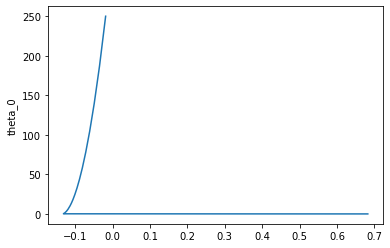

In [59]:
plt.plot(bias,loss)
plt.ylabel('loss')
plt.ylabel('theta_0')

Text(0.5, 0, 'theta_1')

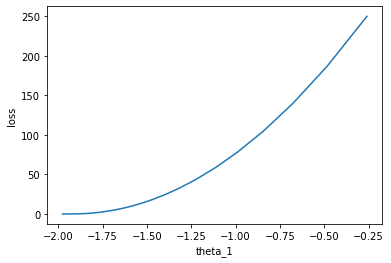

In [60]:
plt.plot(slopes,loss)
plt.ylabel('loss')
plt.xlabel('theta_1')

Text(0, 0.5, 'losses')

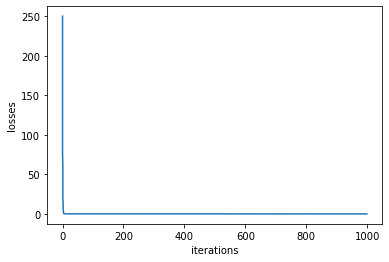

In [61]:
plt.plot(itere,loss)
plt.xlabel('iterations')
plt.ylabel('losses')

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [44]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate):
 
    
    theta_0=0
    theta_1=0
    x_0=1
    slopes=[]
    bias=[]
    hyp=[]
    loss=[]
    itere=[]
    total_samples =len(X) 
    import numpy as np
    for i in range(epochs):    
        random_index = np.random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        hypothsis_fn=theta_0+theta_1*sample_x
    
        gradient_theta_0=np.sum(hypothsis_fn - sample_y)
        gradient_theta_1=np.sum((hypothsis_fn - sample_y)*sample_x)
        
        theta_0=theta_0-learning_rate*gradient_theta_0
        bias.append(theta_0)
        theta_1=theta_1-learning_rate*gradient_theta_1
        slopes.append(theta_1)
        
        cost_fn=np.sum((hypothsis_fn - sample_y)**2)
        loss.append(cost_fn)
        itere.append(i)
        
    return slopes, bias,cost_fn,loss,itere,theta_1,theta_0


In [45]:
slopes, bias,cost_fn,loss,itere,theta_1,theta_0=stochastic_gradient_descent(data,label,1000,0.0001)
y=theta_0+(theta_1*data)

In [46]:
a=r2_score(label,y)
a

0.9976953525507859

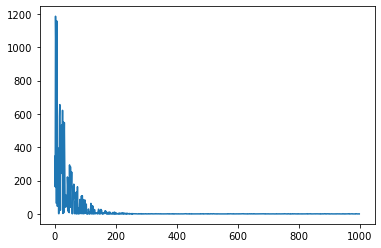

In [47]:
plt.plot(itere,loss)

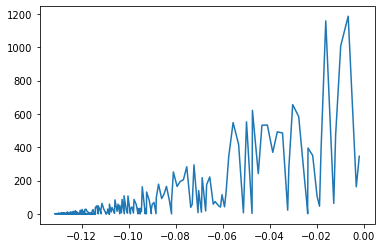

In [48]:
plt.plot(bias,loss)

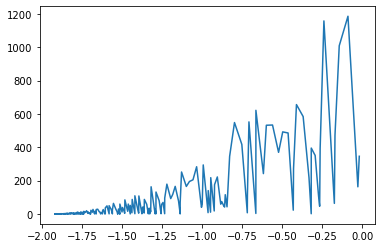

In [49]:
plt.plot(slopes,loss)